<a href="https://colab.research.google.com/github/michelleabraham-git/Stats_minor/blob/main/Copy_of_CSSL_06_polynomial_regression_bias_variance_tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial regression
Let's try loading a dataset a dataset from Kaggle. To do this, you will need to [create a legacy API key from Kaggle](https://www.kaggle.com/settings). This will download a kaggle.json file.

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tals555","key":"8fd185856389fe27280cadd3c896f4fe"}'}

In [ ]:
# Change the permissions of the kaggle.json file such that only you can read/write the file.
# This is to prevent someone else from modifying the file.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install -q kaggle # Install that Kaggle package to interact with Kaggle's datasets; pip is python's package manager

In [ ]:
!kaggle datasets download -d mirajdeepbhandari/polynomial-regression

Dataset URL: https://www.kaggle.com/datasets/mirajdeepbhandari/polynomial-regression
License(s): CC0-1.0
  0% 0.00/1.18k [00:00<?, ?B/s]
100% 1.18k/1.18k [00:00<00:00, 4.04MB/s]


In [ ]:
!unzip polynomial-regression.zip

Archive:  polynomial-regression.zip
replace Ice_cream selling data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Import necessary packages
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.metrics import PredictionErrorDisplay

In [ ]:
os.listdir() # Look for the files/directories within the current directory

['.config',
 'Ice_cream selling data.csv',
 'kaggle.json',
 'polynomial-regression.zip',
 'sample_data']

The Ice_cream selling data.csv is available!

In [ ]:
data = pd.read_csv("Ice_cream selling data.csv") # Read the csv file into a pandas dataframe
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [ ]:
data.shape

(49, 2)

In [ ]:
data.info() # Gives basic information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


In [ ]:
data.describe() # Gives basic statistics about the columns of the dataframe

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [ ]:
data.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [ ]:
X = data.iloc[:, :-1] #take all rows and columns until -1
y = data.iloc[:, -1]

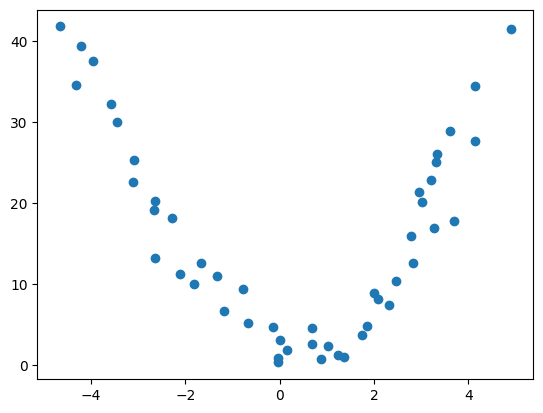

In [ ]:
plt.figure()
plt.scatter(X, y)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(34, 1) (34,) (15, 1) (15,)


In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [ ]:
r2_train =model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)
print(r2_train, r2_test)

0.02937510720510217 -0.03912798782600069


In [ ]:
help(model.score)


Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Return the coefficient of determination of the prediction.

    The coefficient of determination :math:`R^2` is defined as
    :math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
    sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
    is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always predicts
    the expected value of `y`, disregarding the input features, would get
    a :math:`R^2` score of 0.0.

    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, where ``n_s

In [ ]:
predict = np.round(model.predict(X_test), decimals = 1)

In [ ]:
pd.DataFrame({"Actual Performance" : y_test, "Predicted  Performance" : predict})

,Actual Performance,Predicted Performance
29,0.953115,15.9
4,32.284531,19.7
26,0.789974,16.3
30,3.782570,15.6
32,8.943823,15.4
37,12.568237,14.8
34,7.412094,15.2
40,22.839406,14.5
7,25.365022,19.3
10,13.275828,19.0


AttributeError: module 'numpy' has no attribute 'arrange'

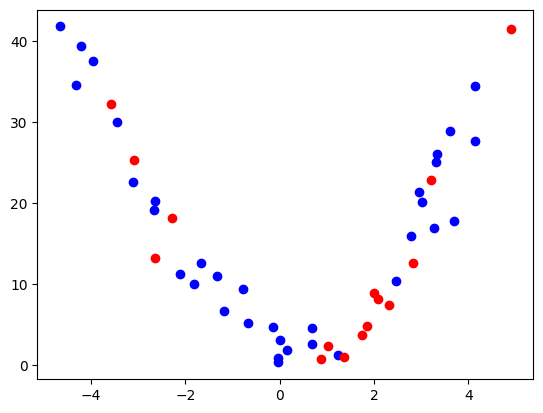

In [ ]:
plt.figure()
plt.scatter(X_train, y_train, c='b')
plt.scatter(X_test, y_test, c='r')
x_values = np.arrange(-5,5,0.01)
y_values = model.coef_[0]*x_values + model.intercept_
plt.plot(x_values, y_values,"k")
plt.plot(x_values,[np.mean(y)]*len(x_values,c="g"))



In [ ]:

r2_score(y_test,predict)

-0.03900093132092275

In [ ]:

model.coef_, model.intercept_


(array([-0.76405794]), np.float64(16.962431949649158))

In [ ]:
poly_features = PolynomialFeatures(degree=2)
X_transformed= poly_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.3, random_state = 0)


#Fit using Linear Regression model
model = LinearRegression()
model.fit(X_train,y_train)

r2_train =model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)


y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_error= mean_squared_error(y_train,y_pred_train)
test_error= mean_squared_error(y_test,y_pred_test)

print(r2_train, r2_test)
print(train_error, test_error)

0.933109383805153 0.9112396415848207
9.861627186505526 12.351860655176438


In [ ]:
degrees=range(1,10)
train_errors=[]
training_error=[]
for degree in degrees:
  ploy_features- PolynomialFeatures(degree=degrees)




poly_features = PolynomialFeatures(degree=2)
X_transformed= poly_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.3, random_state = 0)


#Fit using Linear Regression model
model = LinearRegression()
model.fit(X_train,y_train)

r2_train =model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)


y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_error= mean_squared_error(y_train,y_pred_train)
test_error= mean_squared_error(y_test,y_pred_test)

print(r2_train, r2_test)
print(train_error, test_error)

0.933109383805153 0.9112396415848207
9.861627186505526 12.351860655176438
